# Exploring Dataset

In [1]:
# Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

stopwords = set(STOPWORDS)
stopwords.add("br")
%matplotlib inline  
plt.rcParams["figure.figsize"] = (10, 7) 

### Reading in Data

In [2]:
# Read in csv (Source - https://www.kaggle.com/lievgarcia/amazon-reviews)
df = pd.read_csv(r"C:\Machine Learning\UU\amazon_reviews.csv", encoding = "latin")

# Fixing Labels 
df = df.rename(columns={"ï»¿LABEL":"class", "REVIEW_TEXT":"raw_sentence"})

# Re-labeling data for increased accessibility 
df["class"] = df["class"].map({"__label1__": 0, "__label2__": 1})

df.sample(5)

,class,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,raw_sentence
2395,0,1,N,Home Entertainment,Samsung UN60H6350 60-Inch 1080p 120Hz Smart LE...,Low quality and NOT worth the money!!!! Don't ...,I purchased this TV last month as a living roo...
12117,1,5,Y,Furniture,Pragma Bed Cloud Rest 6-Inch Memory Foam Mattr...,Comfortable bed for big guy,I bought 2 of these to go on a split king adju...
9197,0,5,N,Video DVD,Tangled,Funny and Lovely,I love this movie so much. It's funny and love...
13062,1,5,Y,Baby,Hemp / Organic Cotton Fitted Cloth Diapers (In...,Life saver!!!,"Oh my goodness, these are amazing! Our 4 month..."
9030,0,5,N,Musical Instruments,Singing Machine SMM-107 Karaoke Wireless Micro...,Astonishing deal..,"so far, it is so good and it is working great...."


## Columns keys

**`class`** = class label the sentence (**this is our target label**).

    0 - Fake
    1 - Real

**`RATING`** = rating by customer (range 1 - 5)

**`VERIFIED_PURCHASE`** = binary label confirming if the product was truly purchased or not

**`PRODUCT_CATEGORY`** = numerical categories (range 1 - 19)
   
**`raw_sentence`** = raw sentence text

## Data Exploration

<AxesSubplot:>

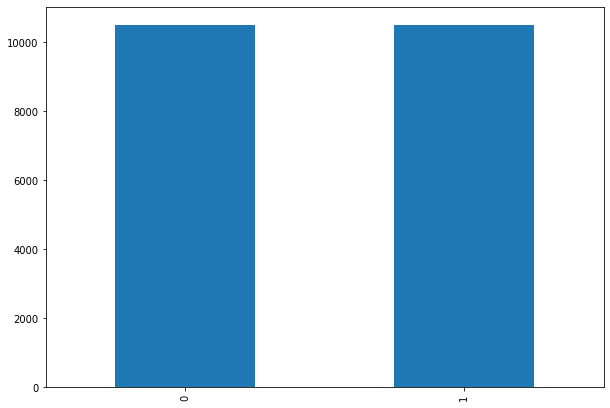

In [3]:
df["class"].value_counts(sort = False).plot.bar(color="#1f77b4")
# Balanced dataset 

Text(0.5, 1.0, 'Product Category by Label')

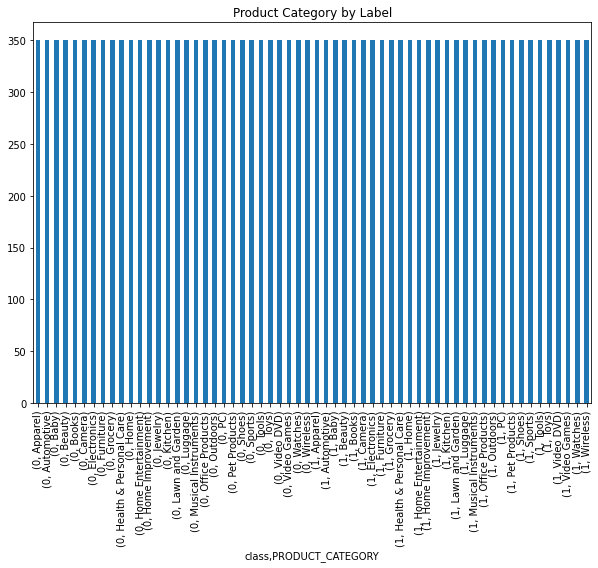

In [4]:
df.groupby(df["class"]).PRODUCT_CATEGORY.value_counts().plot(kind = "bar")
plt.title("Product Category by Label")

# Exactly 350 reviews in each product category for each class 

<AxesSubplot:title={'center':'Ratings by Percent'}>

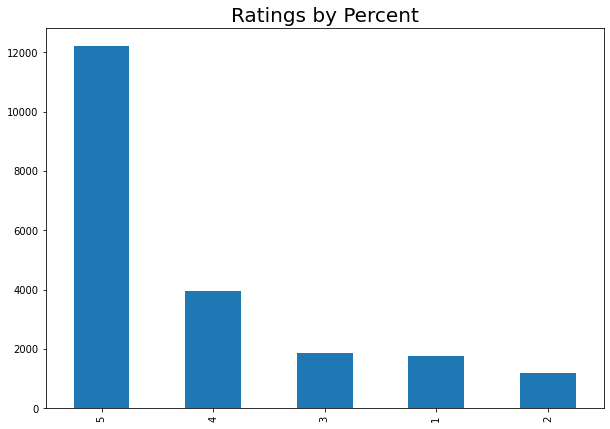

In [5]:
plt.title("Ratings by Percent", fontsize=20)
df.RATING.value_counts().plot(kind="bar")

### Exploring Class Specific Components

REAL WORD_COUNT MEAN: 79.09 
FALSE WORD_COUNT MEAN: 59.29


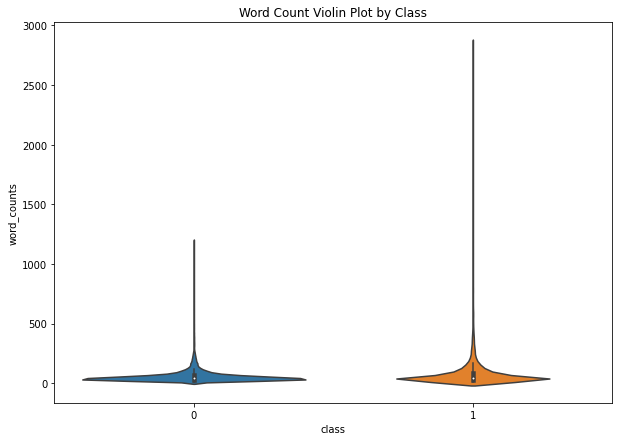

In [6]:
df["word_counts"] = df["raw_sentence"].apply(lambda x: len(str(x).split()))
sns.violinplot(data=df, x="class", y="word_counts").set_title("Word Count Violin Plot by Class")
r = round(df["word_counts"][df["class"] == 1].mean(),2)
f = round(df["word_counts"][df["class"] == 0].mean(),2)
print(f"REAL WORD_COUNT MEAN: {r} \nFALSE WORD_COUNT MEAN: {f}")

REAL CHAR_COUNT MEAN: 428.18 
FALSE CHAR_COUNT MEAN: 316.61


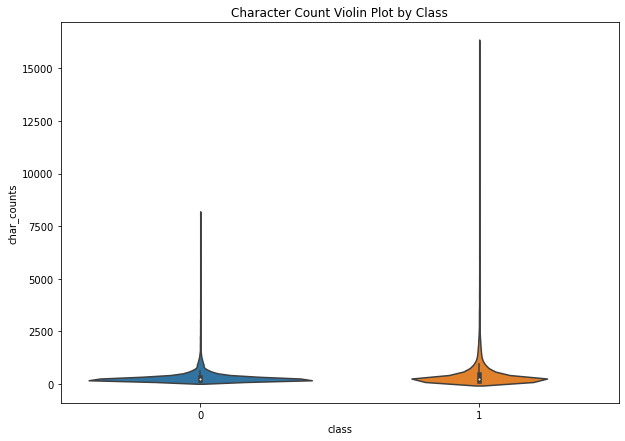

In [7]:
df["char_counts"] = df["raw_sentence"].apply(lambda x: len(str(x)))
sns.violinplot(data=df, x="class", y="char_counts").set_title("Character Count Violin Plot by Class")
r = round(df["char_counts"][df["class"] == 1].mean(),2)
f = round(df["char_counts"][df["class"] == 0].mean(),2)
print(f"REAL CHAR_COUNT MEAN: {r} \nFALSE CHAR_COUNT MEAN: {f}")

Both word count and character counts follow a similar pattern. Fake reviews *tend to* have sigificantly less characters and words.

### Word Clouds

In [8]:
# Converting to a useable wordcloud format (str) by class
df_real = df["raw_sentence"][df["class"] == 1]
df_fake = df["raw_sentence"][df["class"] == 0]

real_str = ' '.join(df_real)
fake_str = ' '.join(df_fake)

In [9]:
def word_cloud(string, review_class):
    """
    Plots word cloud for string input
    review_class is a binary input for labeling
    """
    # instantiate a word cloud object
    wc = WordCloud(background_color="white",
                   colormap="RdYlGn",
                   max_words=2000,
                   stopwords=stopwords)

    # generate the word cloud
    wc.generate(string)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    if review_class == 1:
        plt.title("Real Review Word Cloud")
    else:
        plt.title("Fake Review Word Cloud")
    
    return plt.show()

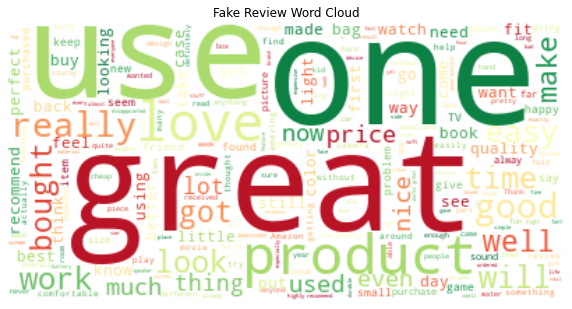

In [10]:
word_cloud(fake_str, 0)

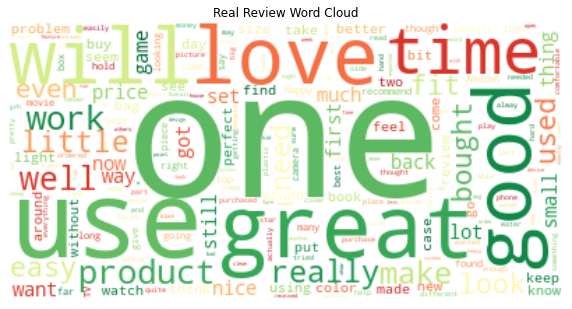

In [11]:
word_cloud(real_str, 1)

The similarities in word usage highlight the difficulties to discern between real and fake reviews, a task that can only be reasonably be accomplished by machine learning